# Evaluation of expression prediction 

Various models for prediction of gene expression upon perturbation or across modalities have been proposed, such as scGEN, GEARS, chemCPA, PerturbNet, scPreGAN, and others. They are commonly evaluated with ground-truth data to which predictions are compared with various metrics that capture expression mean/variance/distribution or truthfulness of downstream results based on DE genes or embeddings. To support evaluation approach choices we performed simulations (using SPARSim package) and computed pertpy metrics on different simulated daatasets.

## Selecting distance metric
While models are often evaluated by computing R2 between predicted and ground truth data, other metrics could be likewise used for this task. To determine which metric is the most truthful and sensitive for both large and small diefferences between cell groups we prepared simulated data with gradually increasing expression distance between groups. Besides this, there are other important metric characteristics that would be worth considering, such as robustness in the presence of small library or cell group size, and robustness to noise when adding irrelevant noisy genes. Some of these are further discussed in Ji, Y., et al. (2023).

We simulated the data as follows: We analysed real data of single cell type in two conditions, computing log fold changes (lFC) between genes. The lFCs can be modelled with Cauchy distibution, which can be used to sample lFCs to add upon the one condition's parameters (e.g. ground truth) to simulate the second condition (e.g. predicted). By increasing or decreasing the width of the Cauchy distibution we simulated smaller or larger diferences between the two cell groups. Below we show how different metrics behave in the presence of small and large differences.

For description of the here used metrics please refer to pertpy documentation and distance tutorial.

For every simulation we performed five replicates (summarised as mean (bold line) and 95% confidence interval (dashed region)). Shown are distance between two groups as specified above on x-axis and relative metric value (scaled to [0,1]) on y-axis.

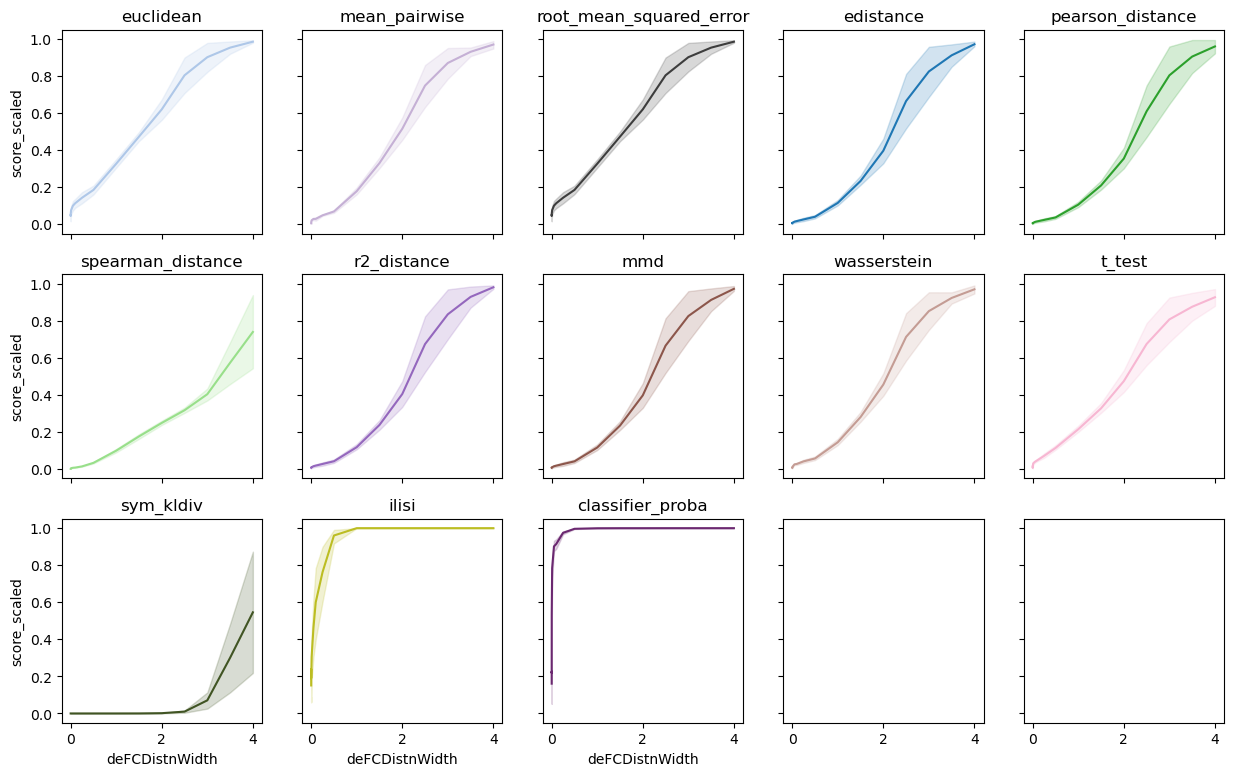

Same as above, but showing simulated group differences on log scale.

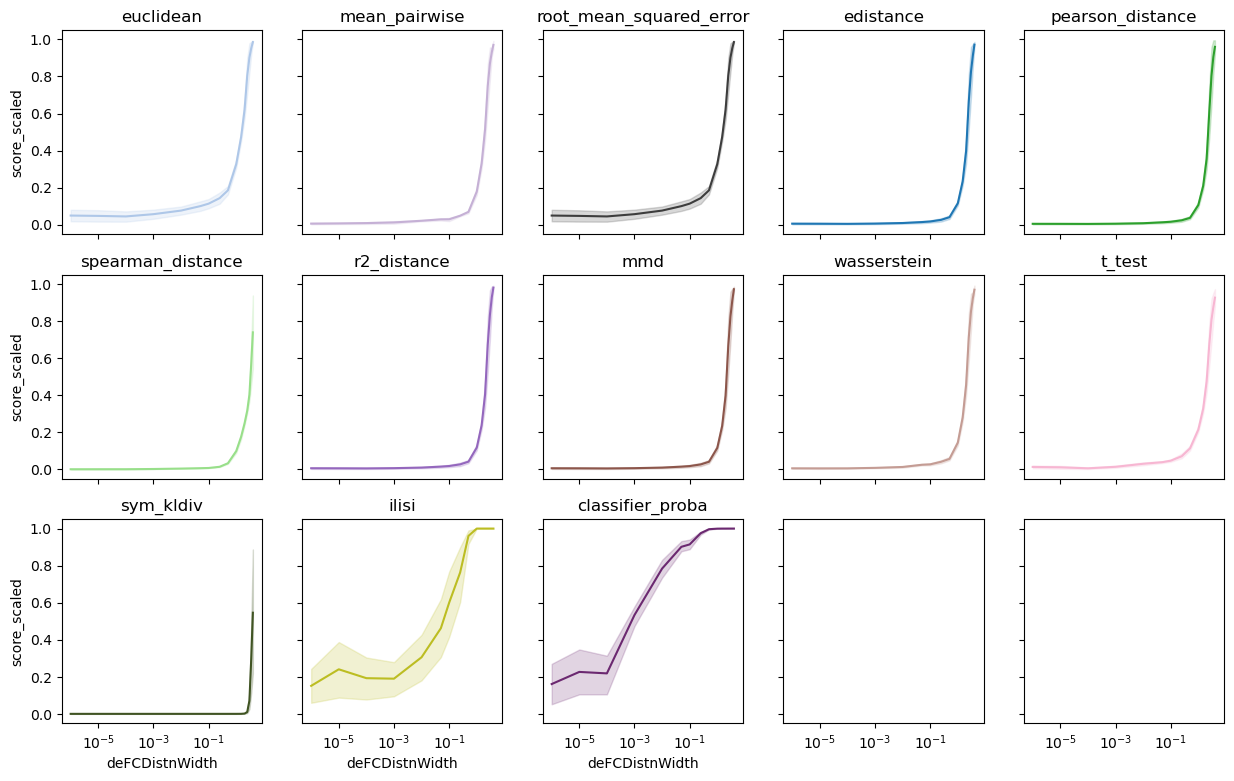

The Euclidean distance increases relatively linearly alongside increasing distance between two groups. Furthemore, it is relavively sensitive to small differences and does not saturate quickly when increasing the differences. Thus, we porpose that Euclidean distance should be used when comparing expression differences between two groups of cells.

## Comparison of perturbation prediction to control and perturbed ground-truth state
Many of the prediction models operate by taking as input control state and predicting expression in a perturbed state. We want to evaluate how the prediction performs in relation to both groups: control condition input into the model and the target perturbed condition. Thus, we propose different ways for computing distance of the prediction to the ground-truth while accounting for the input condition.

We consider the following metrics:
- Euclidean distance between target and prediction divided by distance between target and input. This was computed either on expression directly (dist_simple) or on expression that w2as scaled to [0,1] on ground truth data (input and target) with predited data scaled with the same scaler (dist_scaled). 
- Accuracy of classifying predicted data as input or target (norm_clf_accuracy).
- Comparsion of DE results between input-target and inoput-prediction by correlating DE test scores (deg_scores_corr and deg_scores_ranks_corr) and by computing the overlap between top DE genes (shared_top_100_genes).

We simulated data of two groups (input and target) and third group which represents the prediction. The third group was obtained by interpolating the intensity between the input and target groups.

The plot shows metric scores (y-axis) over interpolation values (x-axis) with identity line in dotted gray. Shown are mean and confidence interval of metrics scaled to [0,1] as above. 

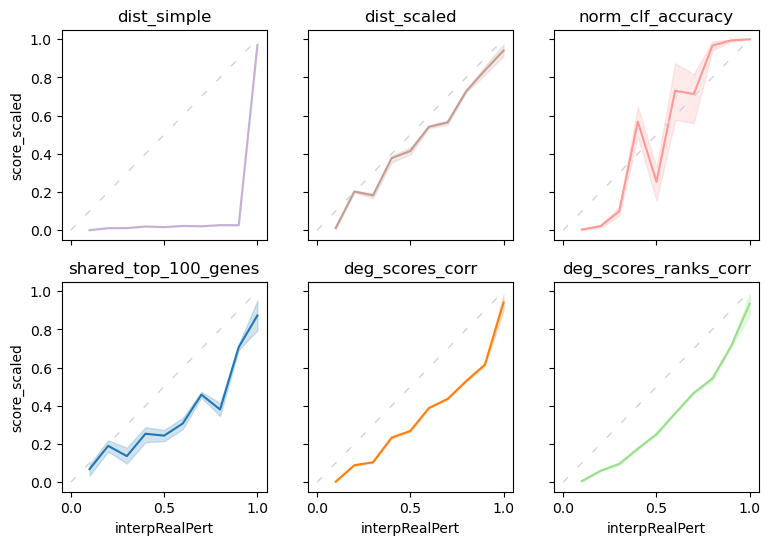

Based on these results we suggest using dist_scaled for evaluating the predicted expression quality.

## Realtionship between mean and variance of expression
Expression mean and variance of genes are correlated in real data. Thus, we need to evaluate if this relationship is preserved in the predicted data. Furthemore, this correlation can also bias our interpretation of the above described metrics that are aimed at evaluating only one data moment.

To evaluate the differences in the relationship between mean and variance we compute KDE on mean-variance data of both conditions and then compute the difference between the two KDE evaluations (mean_var_distn), inspired by [Cao, et al. (2021)](https://www.nature.com/articles/s41467-021-27130-w). Besides that, we also used some other above-described metrics for comparison.

We performed two simulations for a pair of cell groups with differences in variance. In one simulation (called varianceSize_sim) we changed variance used for simulating gene expression (i.e. cell population variation before sequencing) and in the other (called varianceSize_data) we changed variance after after simulation, assuming that normalized log-transformed data is approximately normally distributed, which allowed us to sample expression values from normal distibutions with fixed means but different variances.

the below plot shows variance multiplier on x-axis and metric score normalized to [0,1] on y-axis. Shown are mean and confidence interval across replicates as described above.

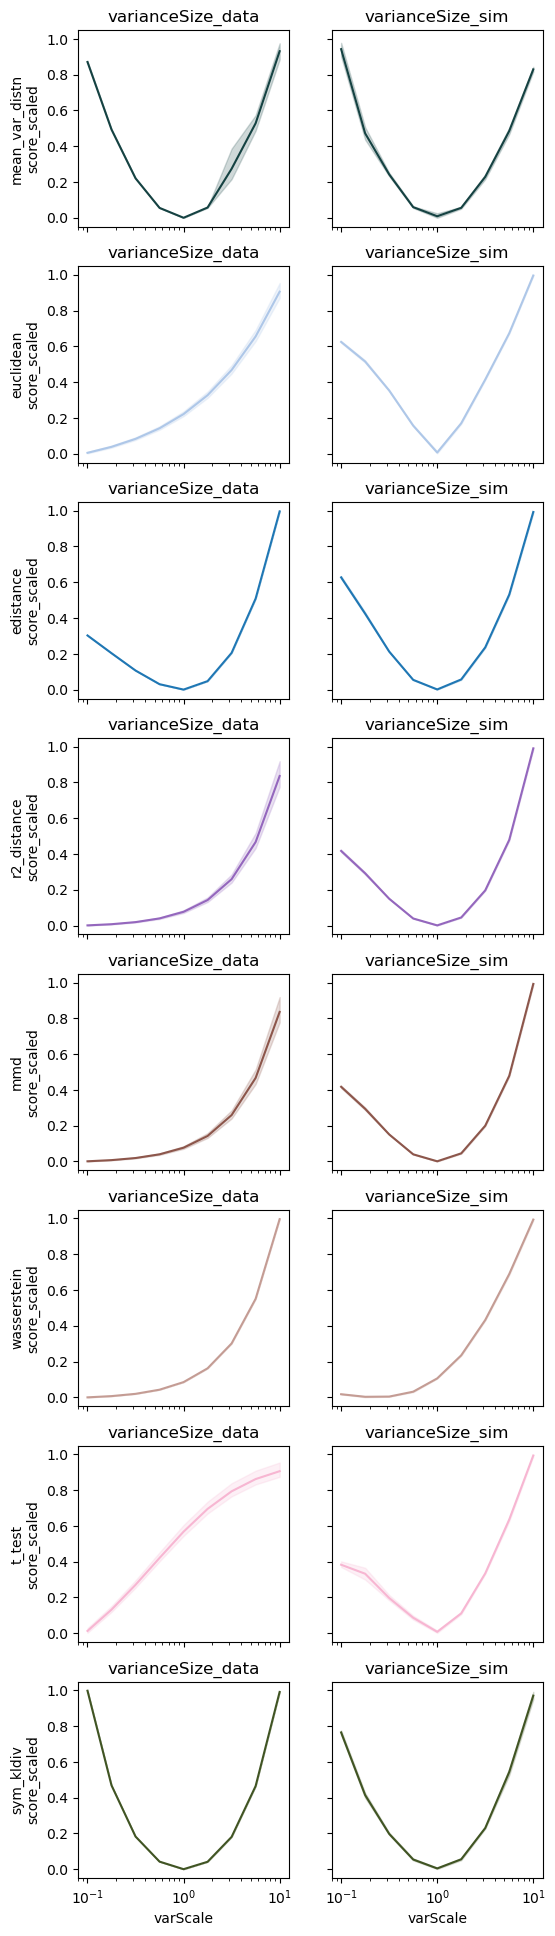

We suggest using the mean_var_distn metric, with sym_kldiv also being a good option. Other metrics, even when mesauring only mean expression, are also affected by the changes in the variance. However, they do not perform equally when variance is increased or decreased, which can be explained for some metrics by uisng one of the groups as the reference and for others by being primarly affected by increased noise, with lower noise after simulation leading to little changes in mean expression. Furtehmore, some metrics perform differently in the two simulation scenarios.

## Biological interpretation & in-depth evaluation

While the above described metrics measure similarity between predicted and ground-truth data, they do not directly tell us how this will affect our biological interpretation or if there may be any hidden biases among gene predictions. First, it is unsure if certain distance between groups affects our interpretation of the data or if it is too minute to be biologically relevant. Second, we computed metrics on all genes, while in really only certain gene groups (e.g. DEGs or certain biological pathways) may be of interest. Thus, metrics could be used to compare a pre-defined set of genes. Third, by computing metrics on all genes we disregard biases in prediction, such as differences in prediction quality at different expression levels or in genes that are lowly expressed in training data. Overall, analysis of the perturbation models should be combined with more in depth analysis of potential biases and biological interpretation.

## Conclusion

We suggest that basic evaluation of perturbation model consists of comparing the predicted data to target and input condition in a relative manner with Euclidean distance (dist_scaled) and that mean-variance relationship be evaluated using mean_var_distn. 

Further work will be needed to provide guidelines on how to better spot additional biases in predictions and their biological relevance. Furthemore, our metric evaluation is not exhaustive and additional simulations would be beneficial as well as tests with real data and model predictions.